Importing Packages
=====================

In [1]:
import os
from scipy import signal
import cv2
import math
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Loading data
=============

In [2]:
data = pd.read_csv('data/driving_log.csv')

In [3]:
data.head()

,center,left,right,steering,throttle,brake,speed
0,IMG\center_2016_12_01_13_30_48_287.jpg,IMG\left_2016_12_01_13_30_48_287.jpg,IMG\right_2016_12_01_13_30_48_287.jpg,0.0,0.0,0.0,22.148290
1,IMG\center_2016_12_01_13_30_48_404.jpg,IMG\left_2016_12_01_13_30_48_404.jpg,IMG\right_2016_12_01_13_30_48_404.jpg,0.0,0.0,0.0,21.879630
2,IMG\center_2016_12_01_13_31_12_937.jpg,IMG\left_2016_12_01_13_31_12_937.jpg,IMG\right_2016_12_01_13_31_12_937.jpg,0.0,0.0,0.0,1.453011
3,IMG\center_2016_12_01_13_31_13_037.jpg,IMG\left_2016_12_01_13_31_13_037.jpg,IMG\right_2016_12_01_13_31_13_037.jpg,0.0,0.0,0.0,1.438419
4,IMG\center_2016_12_01_13_31_13_177.jpg,IMG\left_2016_12_01_13_31_13_177.jpg,IMG\right_2016_12_01_13_31_13_177.jpg,0.0,0.0,0.0,1.418236


In [4]:
data['direction'] = pd.Series('s', index=data.index)

In [5]:
data.head()

,center,left,right,steering,throttle,brake,speed,direction
0,IMG\center_2016_12_01_13_30_48_287.jpg,IMG\left_2016_12_01_13_30_48_287.jpg,IMG\right_2016_12_01_13_30_48_287.jpg,0.0,0.0,0.0,22.148290,s
1,IMG\center_2016_12_01_13_30_48_404.jpg,IMG\left_2016_12_01_13_30_48_404.jpg,IMG\right_2016_12_01_13_30_48_404.jpg,0.0,0.0,0.0,21.879630,s
2,IMG\center_2016_12_01_13_31_12_937.jpg,IMG\left_2016_12_01_13_31_12_937.jpg,IMG\right_2016_12_01_13_31_12_937.jpg,0.0,0.0,0.0,1.453011,s
3,IMG\center_2016_12_01_13_31_13_037.jpg,IMG\left_2016_12_01_13_31_13_037.jpg,IMG\right_2016_12_01_13_31_13_037.jpg,0.0,0.0,0.0,1.438419,s
4,IMG\center_2016_12_01_13_31_13_177.jpg,IMG\left_2016_12_01_13_31_13_177.jpg,IMG\right_2016_12_01_13_31_13_177.jpg,0.0,0.0,0.0,1.418236,s


In [6]:
rev = np.array(data.steering, dtype=np.float32)
rev

array([ 0.,  0.,  0., ...,  0.,  0.,  0.], dtype=float32)

In [7]:
time = np.arange(len(rev))
x_s = np.array(data.steering)
y_s = rev

In [8]:
steering_sm_s = rev
data['steering_sm'] = pd.Series(steering_sm_s, index=data.index)

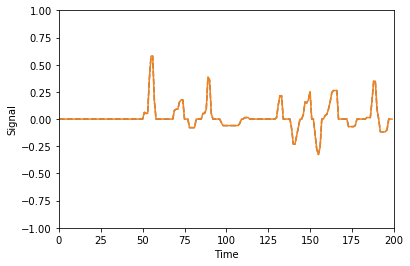

In [9]:
plt.plot(time[0:200],x_s[0:200], '--',
         time[0:200],y_s[0:200])
plt.xlabel('Time')
plt.ylabel('Signal')
plt.ylim(-1,1)
plt.xlim(0,200)
plt.show()

In [10]:
data.head()

,center,left,right,steering,throttle,brake,speed,direction,steering_sm
0,IMG\center_2016_12_01_13_30_48_287.jpg,IMG\left_2016_12_01_13_30_48_287.jpg,IMG\right_2016_12_01_13_30_48_287.jpg,0.0,0.0,0.0,22.148290,s,0.0
1,IMG\center_2016_12_01_13_30_48_404.jpg,IMG\left_2016_12_01_13_30_48_404.jpg,IMG\right_2016_12_01_13_30_48_404.jpg,0.0,0.0,0.0,21.879630,s,0.0
2,IMG\center_2016_12_01_13_31_12_937.jpg,IMG\left_2016_12_01_13_31_12_937.jpg,IMG\right_2016_12_01_13_31_12_937.jpg,0.0,0.0,0.0,1.453011,s,0.0
3,IMG\center_2016_12_01_13_31_13_037.jpg,IMG\left_2016_12_01_13_31_13_037.jpg,IMG\right_2016_12_01_13_31_13_037.jpg,0.0,0.0,0.0,1.438419,s,0.0
4,IMG\center_2016_12_01_13_31_13_177.jpg,IMG\left_2016_12_01_13_31_13_177.jpg,IMG\right_2016_12_01_13_31_13_177.jpg,0.0,0.0,0.0,1.418236,s,0.0


Removing data with speed below .25
======================================

In [11]:
index = data['throttle'] > .25
data = data[index].reset_index()

In [12]:
data.head()

,index,center,left,right,steering,throttle,brake,speed,direction,steering_sm
0,50,IMG\center_2016_12_01_13_32_43_357.jpg,IMG\left_2016_12_01_13_32_43_357.jpg,IMG\right_2016_12_01_13_32_43_357.jpg,0.000000,0.735778,0.0,0.953669,s,0.000000
1,51,IMG\center_2016_12_01_13_32_43_457.jpg,IMG\left_2016_12_01_13_32_43_457.jpg,IMG\right_2016_12_01_13_32_43_457.jpg,0.061760,0.985533,0.0,2.124567,s,0.061760
2,52,IMG\center_2016_12_01_13_32_43_558.jpg,IMG\left_2016_12_01_13_32_43_558.jpg,IMG\right_2016_12_01_13_32_43_558.jpg,0.052191,0.985533,0.0,3.286475,s,0.052191
3,53,IMG\center_2016_12_01_13_32_43_659.jpg,IMG\left_2016_12_01_13_32_43_659.jpg,IMG\right_2016_12_01_13_32_43_659.jpg,0.052191,0.985533,0.0,4.440864,s,0.052191
4,54,IMG\center_2016_12_01_13_32_43_761.jpg,IMG\left_2016_12_01_13_32_43_761.jpg,IMG\right_2016_12_01_13_32_43_761.jpg,0.367953,0.985533,0.0,5.565724,s,0.367953


In [13]:
data.tail()

,index,center,left,right,steering,throttle,brake,speed,direction,steering_sm
7998,9889,IMG\center_2017_03_05_22_14_45_257.jpg,IMG\left_2017_03_05_22_14_45_257.jpg,IMG\right_2017_03_05_22_14_45_257.jpg,0.0,1.000000,0.0,30.18993,s,0.0
7999,9890,IMG\center_2017_03_05_22_14_45_343.jpg,IMG\left_2017_03_05_22_14_45_343.jpg,IMG\right_2017_03_05_22_14_45_343.jpg,0.0,1.000000,0.0,30.18993,s,0.0
8000,9891,IMG\center_2017_03_05_22_14_45_432.jpg,IMG\left_2017_03_05_22_14_45_432.jpg,IMG\right_2017_03_05_22_14_45_432.jpg,0.0,0.839210,0.0,30.15355,s,0.0
8001,9892,IMG\center_2017_03_05_22_14_45_508.jpg,IMG\left_2017_03_05_22_14_45_508.jpg,IMG\right_2017_03_05_22_14_45_508.jpg,0.0,0.610652,0.0,30.08253,s,0.0
8002,9893,IMG\center_2017_03_05_22_14_45_605.jpg,IMG\left_2017_03_05_22_14_45_605.jpg,IMG\right_2017_03_05_22_14_45_605.jpg,0.0,0.319922,0.0,30.02487,s,0.0


In [14]:
len(data)

8003

In [15]:
def process_new_image_file(name):
    image = cv2.imread('data\\'+ name)
    
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = image / 255. - 0.5
    return image

In [16]:
a = data['center'][50].strip()
a

'IMG\\center_2016_12_01_13_32_48_402.jpg'

In [17]:
b = data['center'][8000].strip('IMG\\')
b

'center_2017_03_05_22_14_45_432.jpg'

Augmentation 1: Including Left and Right Images
======================================================

In [18]:
index_num = 50

image_c = process_new_image_file(data['center'][index_num].strip())
image_r = process_new_image_file(data['right'][index_num].strip())
image_l = process_new_image_file(data['left'][index_num].strip())


(-0.5, 319.5, 159.5, -0.5)

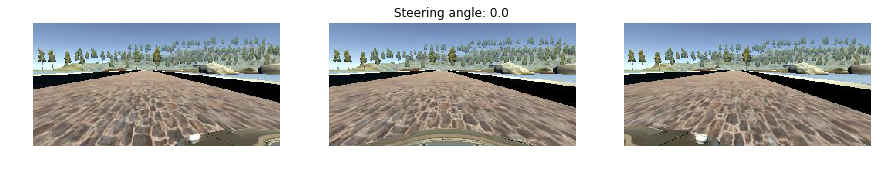

In [19]:
plt.figure(figsize=(15,11))
plt.subplot(1,3,1)
plt.imshow(image_l + 0.5)
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(image_c + 0.5)
plt.axis('off')

plt.title('Steering angle: ' + str(np.round(y_s[index_num] *25, 2)))

plt.subplot(1,3,3)
plt.imshow(image_r + 0.5)
plt.axis('off')

In figure above, I experimented with how to augment left and right camera angles to match center panel data.

A shift of .25 is used. This shift value corresponds to $6.25^\circ$. 

The right camera would have to move left to come to center, and left camera would have to move right to come to center. So I added .25 to get steering angle for left camera image and subtracted .25 to compute angle for the right camera image.

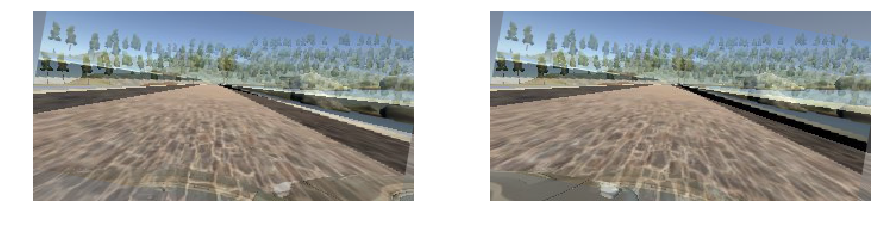

In [20]:
angle_rotation = 10
trans_camera = 5

rows, cols, channels = image_c.shape


Mt = np.float32([[1,0,-trans_camera], [0,1,0]])
Mr = cv2.getRotationMatrix2D((cols/2, rows/2), -angle_rotation, 1)
rows, cols, channels = image_c.shape
image_c_mod = cv2.warpAffine(image_c, Mr, (cols, rows))
image_C_mod = cv2.warpAffine(image_c_mod, Mt, (cols, rows))
image_rc_mod = cv2.addWeighted(image_r, 0.5, image_c_mod, 0.5, 0)


Mt = np.float32([[1,0,trans_camera], [0,1,0]])
Mr = cv2.getRotationMatrix2D((cols/2, rows/2), -angle_rotation, 1)
rows, cols, channels = image_c.shape
image_c_mod = cv2.warpAffine(image_c, Mr, (cols, rows))
image_C_mod = cv2.warpAffine(image_c_mod, Mt, (cols, rows))
image_lc_mod = cv2.addWeighted(image_l, 0.5, image_c_mod, 0.5, 0)


plt.figure(figsize=(15,11))
plt.subplot(1,2,1)
plt.imshow(image_lc_mod+.5)
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(image_rc_mod+.5)
plt.axis('off')
plt.show()


In [25]:
def plot_camera_images(data, steering_sm_s, index_num, degree=0):
    image_c = process_new_image_file(data['center'][index_num].strip())
    image_r = process_new_image_file(data['right'][index_num].strip())
    image_l = process_new_image_file(data['left'][index_num].strip())
    
    plt.subplot(1,3,1)
    plt.imshow(image_l + .5)
    plt.axis('off')
    
    if degree == 0:
        plt.title('Steering: ' + str(np.round(steering_sm_s[index_num] *25, 
                                              2)))
    else:
        plt.title('Steering: ' 
                  + str((np.round((steering_sm_s[index_num] + .1) * 180/np.pi,
                                 2))))
        
    plt.subplot(1,3,2)
    plt.imshow(image_c+.5)
    plt.axis('off')
    
    if degree == 0:
        plt.title('Steering:' + str(np.round(steering_sm_s[index_num],
                                            2)))
    else:
        plt.title('Steering: ' 
                  + str((np.round((steering_sm_s[index_num]) * 180/np.pi,
                                 2))))
        
    plt.subplot(1,3,3)
    plt.imshow(image_r+.5)
    plt.axis('off')
    
    if degree == 0:
        plt.title('Steering:' + str(np.round(steering_sm_s[index_num] -.25,
                                            2)))
    else:
        plt.title('Steering: ' 
                  + str((np.round((steering_sm_s[index_num] - .1) * 180/np.pi,
                                 2))))

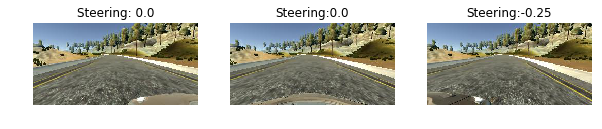

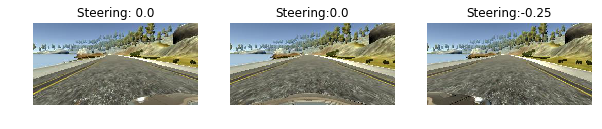

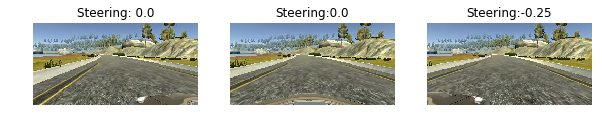

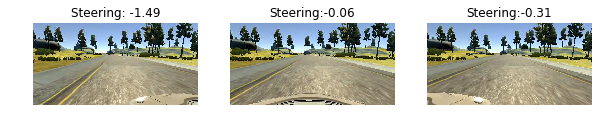

In [27]:
for i in range(4):
    random_i = np.random.randint(len(data) - 1)
    plt.figure(figsize=(10,18))
    plot_camera_images(data, steering_sm_s, random_i, 0)
    plt.show()